In [2]:
import pandas as pd
import os

cwd = os.getcwd()
path = "./results/comparaison.csv"
data = pd.read_csv(path)

meanTimeCounting = 0
meanTimeQuick = 0
meanTimeQuickSeuil = 0
meanTimeQuickRdmSeuil = 0

meanTimeCountingSerieA = 0
meanTimeCountingSerieB = 0
meanTimeCountingSerieC = 0

meanTimeQuickSerieA = 0 
meanTimeQuickSerieB = 0 
meanTimeQuickSerieC = 0 

meanTimeQuickSeuilSerieA = 0 
meanTimeQuickSeuilSerieB = 0
meanTimeQuickSeuilSerieC = 0

meanTimeQuickRdmSeuilSerieA = 0
meanTimeQuickRdmSeuilSerieB = 0
meanTimeQuickRdmSeuilSerieC = 0

group = []
groupInt = 1
timeQuickData = []
timeCountingData = []
timeQuickSeuilData = []
timeQuickRdmSeuilData = []

NUMERO_SERIE = 9
NOMBRE_GROUPE_PAR_GROS_CHIFFRE = 3
NOMBRE_DE_GROS_CHIFFRES = 3

for k in range(NOMBRE_DE_GROS_CHIFFRES):
    for i in range(NOMBRE_GROUPE_PAR_GROS_CHIFFRE):
        for j in range(NUMERO_SERIE):
            timeCounting = data.iat[j + 1, 2]
            timeQuick = data.iat[j + 1, 3]
            timeQuickSeuil = data.iat[j + 1, 4]
            timeQuickRdmSeuil = data.iat[j + 1, 5]
            meanTimeCounting += timeCounting
            meanTimeQuick += timeQuick
            meanTimeQuickSeuil += timeQuickSeuil
            meanTimeQuickRdmSeuil += timeQuickRdmSeuil
        meanTimeCounting /= 10
        meanTimeQuick /= 10
        meanTimeQuickSeuil /= 10
        meanTimeQuickRdmSeuil /= 10
        if i == 0:
            meanTimeCountingSerieA = meanTimeCounting
            meanTimeQuickSerieA = meanTimeQuick
            meanTimeQuickSeuilSerieA = meanTimeQuickSeuil
            meanTimeQuickRdmSeuilSerieA = meanTimeQuickRdmSeuil
            timeCountingData.append(meanTimeCountingSerieA)
            timeQuickData.append(meanTimeQuickSerieA)
            timeQuickSeuilData.append(meanTimeQuickSeuilSerieA)
            timeQuickRdmSeuilData.append(meanTimeQuickRdmSeuilSerieA)
            group.append(groupInt)
            groupInt += 1
        if i == 1:
            meanTimeCountingSerieB = meanTimeCounting
            meanTimeQuickSerieB = meanTimeQuick
            meanTimeQuickSeuilSerieB = meanTimeQuickSeuil
            meanTimeQuickRdmSeuilSerieB = meanTimeQuickRdmSeuil
            timeCountingData.append(meanTimeCountingSerieB)
            timeQuickData.append(meanTimeQuickSerieB)
            timeQuickSeuilData.append(meanTimeQuickSeuilSerieB)
            timeQuickRdmSeuilData.append(meanTimeQuickRdmSeuilSerieB)
            group.append(groupInt)
            groupInt += 1

        if i == 2:
            meanTimeCountingSerieC = meanTimeCounting
            meanTimeQuickSerieC = meanTimeQuick
            meanTimeQuickSeuilSerieC = meanTimeQuickSeuil
            meanTimeQuickRdmSeuilSerieC = meanTimeQuickRdmSeuil
            timeCountingData.append(meanTimeCountingSerieC)
            timeQuickData.append(meanTimeQuickSerieC)
            timeQuickSeuilData.append(meanTimeQuickSeuilSerieC)
            timeQuickRdmSeuilData.append(meanTimeQuickRdmSeuilSerieC)
            group.append(groupInt)
            groupInt += 1

d = {'group': group,
    'timeCounting': timeCountingData,
    'timeQuick': timeQuickData,
    'timeQuickSeuil': timeQuickSeuilData, 
    'timeQuickRdmSeuil': timeQuickRdmSeuilData
    }

df = pd.DataFrame(data=d)
df.to_csv("output.csv", index=False, header=False)
print(df)

   group  timeCounting  timeQuick  timeQuickRdmSeuil  timeQuickSeuil
0      1      0.100041   0.411314           0.387829        0.378416
1      2      0.110045   0.452445           0.426612        0.416257
2      3      0.111045   0.456558           0.430490        0.420041
3      4      0.111145   0.456970           0.430878        0.420420
4      5      0.111155   0.457011           0.430917        0.420458
5      6      0.111156   0.457015           0.430920        0.420461
6      7      0.111156   0.457015           0.430921        0.420462
7      8      0.111156   0.457015           0.430921        0.420462
8      9      0.111156   0.457015           0.430921        0.420462


In [3]:
data.head()

,filename,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil
0,./exemplaires/testset_1000_0.txt,1000,0.155708,0.612555,0.540490,0.515876
1,./exemplaires/testset_1000_1.txt,1000,0.137166,0.551673,0.524033,0.499770
2,./exemplaires/testset_1000_2.txt,1000,0.114983,0.429917,0.412783,0.387639
3,./exemplaires/testset_1000_3.txt,1000,0.125237,0.433568,0.410110,0.454521
4,./exemplaires/testset_1000_4.txt,1000,0.103714,0.413134,0.390337,0.414256


In [4]:
import re
#Fonction pour déterminer la série à partir du nom de fichier
def getSerie(x):
    #Regex qui prend le nombre après le dernier "_" du nom de fichier
    p = re.compile(".*_([^.]*)")
    g = p.match(x["filename"])
    numero = g.group(1)
    if len(numero) == 1:
        return "0"
    return numero[0]

data["serie"] = data.apply(getSerie, axis=1)
data.head()

,filename,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil,serie
0,./exemplaires/testset_1000_0.txt,1000,0.155708,0.612555,0.540490,0.515876,0
1,./exemplaires/testset_1000_1.txt,1000,0.137166,0.551673,0.524033,0.499770,0
2,./exemplaires/testset_1000_2.txt,1000,0.114983,0.429917,0.412783,0.387639,0
3,./exemplaires/testset_1000_3.txt,1000,0.125237,0.433568,0.410110,0.454521,0
4,./exemplaires/testset_1000_4.txt,1000,0.103714,0.413134,0.390337,0.414256,0


In [5]:
data.shape[0]

180

In [36]:
dataNoZeros = data.loc[data["timeCounting"] > 0.001]
dataNoZeros.shape[0]
dataNoZeros["serie"].unique()
serieBCounting = dataNoZeros.loc[dataNoZeros["serie"] == "1"] 
serieBCounting.head()

,filename,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil,serie
10,./exemplaires/testset_1000_10.txt,1000,1895.27,0.405703,0.393648,0.391630,1
11,./exemplaires/testset_1000_11.txt,1000,1937.12,0.384376,0.388884,0.415388,1
12,./exemplaires/testset_1000_12.txt,1000,1935.07,0.385651,0.382868,0.364870,1
13,./exemplaires/testset_1000_13.txt,1000,1923.20,0.397607,0.388729,0.391280,1
14,./exemplaires/testset_1000_14.txt,1000,1893.17,0.399724,0.384941,0.393908,1


In [7]:
serieA = data.loc[data["serie"] == "0"]
serieA.head()

,filename,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil,serie
0,./exemplaires/testset_1000_0.txt,1000,0.155708,0.612555,0.540490,0.515876,0
1,./exemplaires/testset_1000_1.txt,1000,0.137166,0.551673,0.524033,0.499770,0
2,./exemplaires/testset_1000_2.txt,1000,0.114983,0.429917,0.412783,0.387639,0
3,./exemplaires/testset_1000_3.txt,1000,0.125237,0.433568,0.410110,0.454521,0
4,./exemplaires/testset_1000_4.txt,1000,0.103714,0.413134,0.390337,0.414256,0


In [8]:
serieB = data.loc[data["serie"] == "1"]
serieB.head()

,filename,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil,serie
10,./exemplaires/testset_1000_10.txt,1000,1895.27,0.405703,0.393648,0.391630,1
11,./exemplaires/testset_1000_11.txt,1000,1937.12,0.384376,0.388884,0.415388,1
12,./exemplaires/testset_1000_12.txt,1000,1935.07,0.385651,0.382868,0.364870,1
13,./exemplaires/testset_1000_13.txt,1000,1923.20,0.397607,0.388729,0.391280,1
14,./exemplaires/testset_1000_14.txt,1000,1893.17,0.399724,0.384941,0.393908,1


In [9]:
serieC = data.loc[data["serie"] == "2"]
serieC.head()

,filename,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil,serie
20,./exemplaires/testset_1000_20.txt,1000,0.164828,3.492530,3.515890,0.317019,2
21,./exemplaires/testset_1000_21.txt,1000,0.156617,4.265470,4.331570,0.373613,2
22,./exemplaires/testset_1000_22.txt,1000,0.155272,1.502310,1.398380,0.332966,2
23,./exemplaires/testset_1000_23.txt,1000,0.150359,0.945712,0.974354,0.388628,2
24,./exemplaires/testset_1000_24.txt,1000,0.191856,1.259550,1.263130,0.333169,2


In [45]:
serieA = serieA.groupby("numbers").mean().reset_index()

In [46]:
serieB = serieB.groupby("numbers").mean().reset_index()
serieC = serieC.groupby("numbers").mean().reset_index()

serieBCountingMean = serieBCounting.groupby("numbers").mean().reset_index()
serieBCountingMean

,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil
0,1000,2300.91,0.399006,0.392279,0.40022


# TABLEAUX

In [47]:
serieA

,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil
0,1000,0.115611,0.472569,0.432465,0.439416
1,5000,0.512038,2.536519,2.450179,2.437307
2,10000,0.806963,5.227842,5.053352,5.364637
3,50000,4.098182,32.049810,30.790810,30.441270
4,100000,8.136531,66.929330,64.510050,65.131230
5,500000,45.746020,379.150500,369.774700,373.119600


In [48]:
serieB

,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil
0,1000,2300.91,0.399006,0.392279,0.400220
1,5000,0.00,2.391536,2.346480,2.385079
2,10000,0.00,5.166858,5.042762,5.266829
3,50000,0.00,31.241700,30.976820,30.772840
4,100000,0.00,66.057810,65.224070,64.295480
5,500000,0.00,363.278400,359.408600,372.420000


In [49]:
serieC

,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil
0,1000,0.177699,2.518323,2.457705,0.353638
1,5000,0.889351,8.378851,8.459377,2.204078
2,10000,1.471629,17.783860,18.128350,4.968632
3,50000,7.222169,102.791860,103.358160,27.511370
4,100000,14.689970,189.747900,190.020700,59.188180
5,500000,83.406050,1490.861500,1489.347200,334.249000


# TEST DE PUISSANCE

## Graphs de base

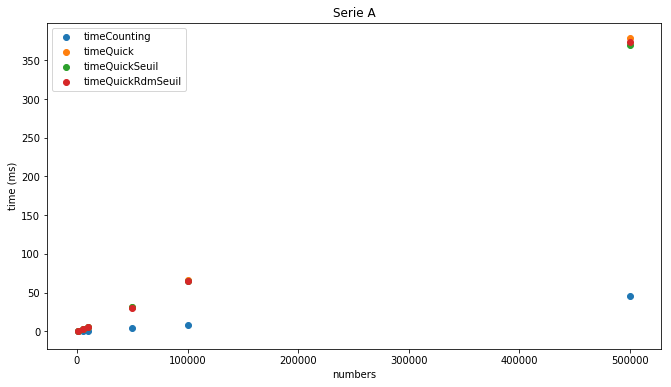

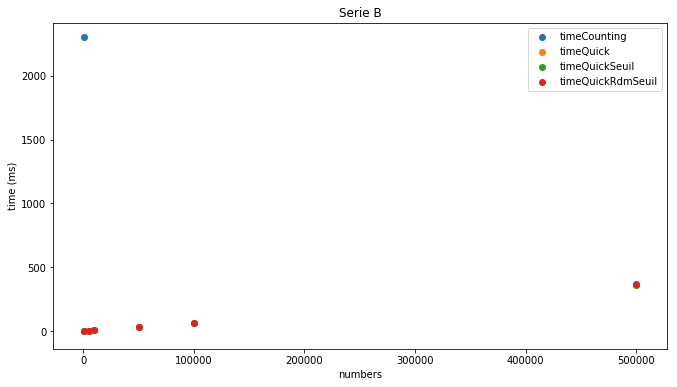

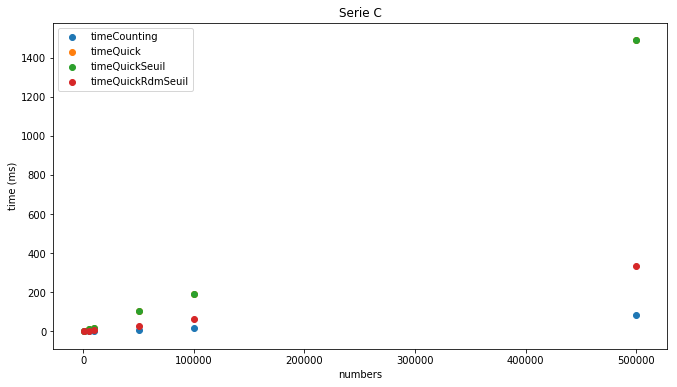

In [55]:
import matplotlib.pyplot as plt

#Serie A
plt.figure(figsize=(11,6))
plt.scatter(serieA["numbers"], serieA["timeCounting"])
plt.scatter(serieA["numbers"], serieA["timeQuick"])
plt.scatter(serieA["numbers"], serieA["timeQuickSeuil"])
plt.scatter(serieA["numbers"], serieA["timeQuickRdmSeuil"])
plt.title('Serie A')
plt.xlabel('numbers')
plt.ylabel('time (ms)')
plt.legend()
plt.show()

plt.figure(figsize=(11,6))

#Serie B (avec le temps pour dénombrement seulement n=1000)
plt.scatter(serieBCountingMean["numbers"], serieBCountingMean["timeCounting"])
plt.scatter(serieB["numbers"], serieB["timeQuick"])
plt.scatter(serieB["numbers"], serieB["timeQuickSeuil"])
plt.scatter(serieB["numbers"], serieB["timeQuickRdmSeuil"])
plt.title('Serie B')
plt.xlabel('numbers')
plt.ylabel('time (ms)')
plt.legend()
plt.show()

#Serie C
plt.figure(figsize=(11,6))
plt.scatter(serieC["numbers"], serieC["timeCounting"])
plt.scatter(serieC["numbers"], serieC["timeQuick"])
plt.scatter(serieC["numbers"], serieC["timeQuickSeuil"])
plt.scatter(serieC["numbers"], serieC["timeQuickRdmSeuil"])
plt.title('Serie C')
plt.xlabel('numbers')
plt.ylabel('time (ms)')
plt.legend()
plt.show()


## Graphs log-log

In [115]:
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import numpy as np
import math

In [129]:
def plotLog(serie):
    plt.figure(figsize=(11,6))
    plt.loglog(serie["numbers"], serie["timeCounting"])
    plt.loglog(serie["numbers"], serie["timeQuick"])
    plt.loglog(serie["numbers"], serie["timeQuickSeuil"])
    plt.loglog(serie["numbers"], serie["timeQuickRdmSeuil"])
    plt.xlabel('numbers')
    plt.ylabel('time (ms)')
    plt.legend()


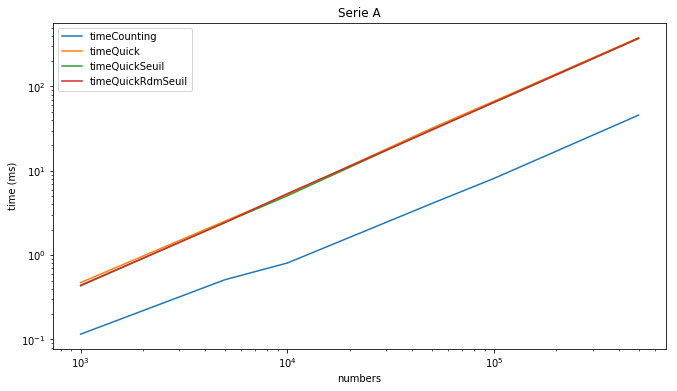

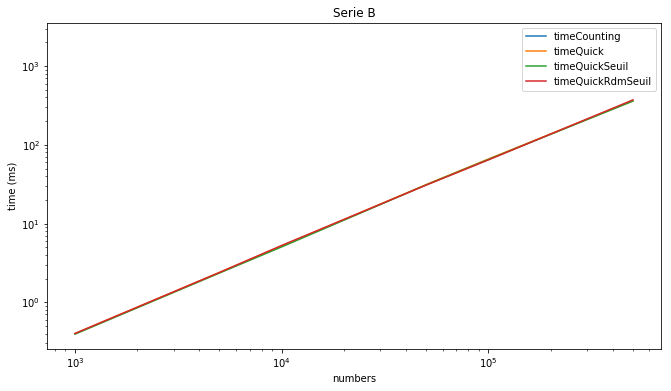

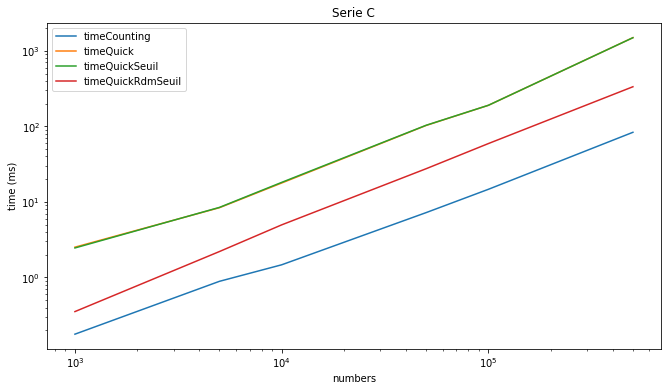

In [80]:


#Serie A
plotLog(serieA)
plt.title('Serie A')
plt.show()

#Serie B (avec le temps pour dénombrement seulement n=1000)
plt.figure(figsize=(11,6))
plt.loglog(serieBCountingMean["numbers"], serieBCountingMean["timeCounting"])
plt.loglog(serieB["numbers"], serieB["timeQuick"])
plt.loglog(serieB["numbers"], serieB["timeQuickSeuil"])
plt.loglog(serieB["numbers"], serieB["timeQuickRdmSeuil"])
plt.xlabel('numbers')
plt.ylabel('time (ms)')
plt.legend()
plt.title('Serie B')
plt.show()

#Serie C
plotLog(serieC)
plt.title('Serie C')
plt.show()

## Linear regression on log(numbers) and log(time)

In [188]:
def logDroiteFunction(logx, m, b):
    return m*logx + b

def computeR2(popt, pcov, xdata, ydata):
    residuals = ydata- logDroiteFunction(xdata, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    return (1 - (ss_res / ss_tot))

def linearLogRegressionLine(serie, algo):
    logSerie = serie
    logSerie["logx"] = np.log10(serie["numbers"])
    logSerie["logy"] = np.log10(serie[algo])
    popt, pcov = curve_fit(logDroiteFunction, logSerie["logx"], logSerie["logy"])
    plt.plot(logSerie["logx"], logDroiteFunction(logSerie["logx"], *popt),  
         label=algo + " ({0:.3f}*x+{1:.3f})".format(*popt))
    print algo
    print ("\tR2: " + str(computeR2(popt, pcov, logSerie["logx"], logSerie["logy"])))
    print "\tm = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt)
    return popt
    
def plotScatterLinRegr(serie, id):
    plt.figure(figsize=(11,6))
    
    paramsCounting = linearLogRegressionLine(serie, "timeCounting")
    paramsQuick = linearLogRegressionLine(serie, "timeQuick")
    paramsQuickSeuil = linearLogRegressionLine(serie, "timeQuickSeuil")
    paramsQuickRdmSeuil = linearLogRegressionLine(serie, "timeQuickRdmSeuil")
    
    plt.scatter(np.log10(serie["numbers"]), np.log10(serie["timeCounting"]))
    plt.scatter(np.log10(serie["numbers"]), np.log10(serie["timeQuick"]))
    plt.scatter(np.log10(serie["numbers"]), np.log10(serie["timeQuickSeuil"]))
    plt.scatter(np.log10(serie["numbers"]), np.log10(serie["timeQuickRdmSeuil"]))
    plt.xlabel('log(numbers)')
    plt.ylabel('log(time)')
    plt.legend()
    plt.title('Serie ' + id)
    plt.show()
    return {"Counting":paramsCounting, "Quick":paramsQuick, "QuickSeuil":paramsQuickSeuil, "QuickRdmSeuil":paramsQuickRdmSeuil}

timeCounting
	R2: 0.9972115769669322
	m = popt[0] = 0.957795488464
	b = popt[1] = -3.85549380828
timeQuick
	R2: 0.9998293066860893
	m = popt[0] = 1.08163837359
	b = popt[1] = -3.58668992709
timeQuickSeuil
	R2: 0.99993806829966
	m = popt[0] = 1.08919263345
	b = popt[1] = -3.63830807138
timeQuickRdmSeuil
	R2: 0.9999700740193299
	m = popt[0] = 1.08693635079
	b = popt[1] = -3.62287553135


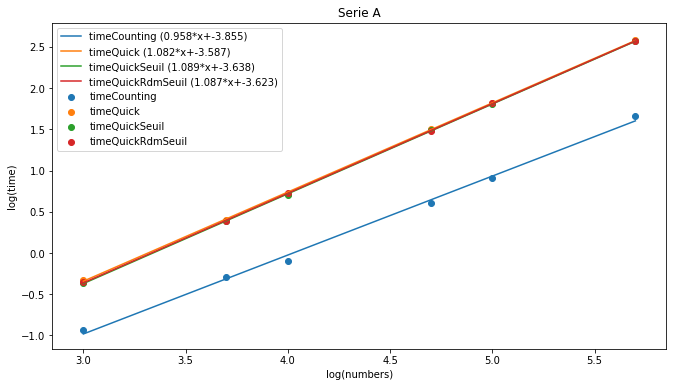

In [189]:
#Serie A
paramsA = plotScatterLinRegr(serieA, "A")

timeQuick
	R2: 0.999862309311818
	m = popt[0] = 1.09958455917
	b = popt[1] = -3.68799642598
timeQuickSeuil
	R2: 0.9998529248634922
	m = popt[0] = 1.10124738315
	b = popt[1] = -3.70190667638
timeQuickRdmSeuil
	R2: 0.9999397943391428
	m = popt[0] = 1.09973335247
	b = popt[1] = -3.68848500053


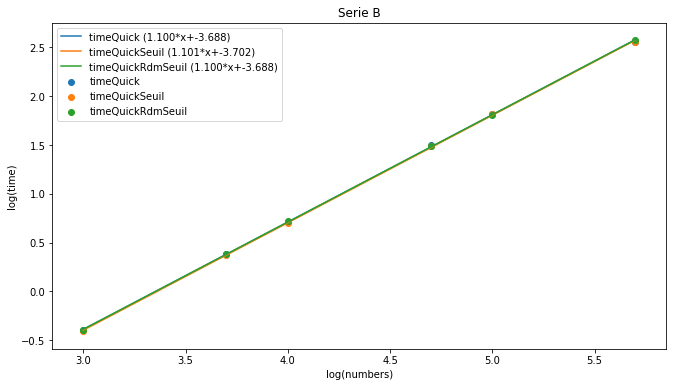

In [390]:
#Serie B
plt.figure(figsize=(11,6))

paramsQuick = linearLogRegressionLine(serieB, "timeQuick")
paramsQuickSeuil = linearLogRegressionLine(serieB, "timeQuickSeuil")
paramsQuickRdmSeuil = linearLogRegressionLine(serieB, "timeQuickRdmSeuil")

plt.scatter(np.log10(serieB["numbers"]), np.log10(serieB["timeQuick"]))
plt.scatter(np.log10(serieB["numbers"]), np.log10(serieB["timeQuickSeuil"]))
plt.scatter(np.log10(serieB["numbers"]), np.log10(serieB["timeQuickRdmSeuil"]))
plt.xlabel('log(numbers)')
plt.ylabel('log(time)')
plt.legend()
plt.title('Serie B')

paramsB = {"Quick":paramsQuick, "QuickSeuil":paramsQuickSeuil, "QuickRdmSeuil":paramsQuickRdmSeuil}

timeCounting
	R2: 0.9983944120392642
	m = popt[0] = 0.980153276352
	b = popt[1] = -3.71092147226
timeQuick
	R2: 0.9919299598561416
	m = popt[0] = 1.03298243272
	b = popt[1] = -2.8199591041
timeQuickSeuil
	R2: 0.9928078622243551
	m = popt[0] = 1.03494949116
	b = popt[1] = -2.82776927015
timeQuickRdmSeuil
	R2: 0.999757245207404
	m = popt[0] = 1.09971268476
	b = popt[1] = -3.72921050991


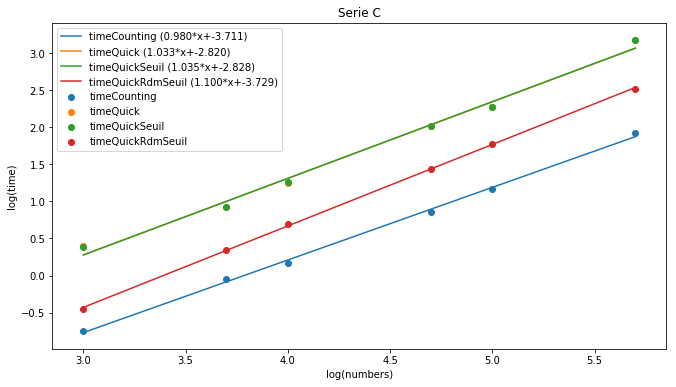

In [191]:
#Serie C
paramsC = plotScatterLinRegr(serieC, "C")

# TEST DU RAPPORT

## Ajouter les colonnes rapport

#### rapports de la fonction trouvée expérimentalement f(x) = a^b * x^m

In [221]:
params = {'A':paramsA, 'B':paramsB, 'C':paramsC}


In [222]:
def f(a, b, x, m):
    return (a ** b) * (x ** m)

def rapport(entrie, serieId, algo):
    a = 10
    m = params[serieId][algo][0]
    b = params[serieId][algo][1]
    x = entrie["numbers"]
    y = entrie["time" + algo]
    return y/f(a, b, x, m)

algos = ['Counting', 'Quick', 'QuickSeuil', 'QuickRdmSeuil']

for algo in algos:
    serieA["rapport" + algo] = serieA.apply(rapport, args=('A', algo), axis=1)
    serieC["rapport" + algo] = serieC.apply(rapport, args=('C', algo), axis=1)
for algo in algos[1:]:
    serieB["rapport" + algo] = serieB.apply(rapport, args=('B', algo), axis=1)

In [223]:
rapA = serieA.loc[:,["numbers", "rapportCounting", "rapportQuick", "rapportQuickSeuil", "rapportQuickRdmSeuil"]]
rapB = serieB.loc[:,["numbers", "rapportCounting", "rapportQuick", "rapportQuickSeuil", "rapportQuickRdmSeuil"]]
rapC = serieC.loc[:,["numbers", "rapportCounting", "rapportQuick", "rapportQuickSeuil", "rapportQuickRdmSeuil"]]
rapA

,numbers,rapportCounting,rapportQuick,rapportQuickSeuil,rapportQuickRdmSeuil
0,1000,1.109450,1.038103,1.015502,1.011446
1,5000,1.051814,0.977193,0.996816,0.975530
2,10000,0.853425,0.951610,0.966311,1.010812
3,50000,0.927754,1.023126,1.020107,0.997372
4,100000,0.948322,1.009519,1.004552,1.004577
5,500000,1.141299,1.002945,0.997629,1.000705


In [224]:
rapB

,numbers,rapportCounting,rapportQuick,rapportQuickSeuil,rapportQuickRdmSeuil
0,1000,NaN,0.977736,0.981205,0.980809
1,5000,NaN,0.998488,0.997338,0.995651
2,10000,NaN,1.006664,0.999046,1.025890
3,50000,NaN,1.037089,1.042834,1.021030
4,100000,NaN,1.023288,1.023476,0.995402
5,500000,NaN,0.958819,0.958339,0.982134


In [225]:
rapC

,numbers,rapportCounting,rapportQuick,rapportQuickSeuil,rapportQuickRdmSeuil
0,1000,1.047483,1.324717,1.298526,0.951988
1,5000,1.082523,0.835935,0.845007,1.010726
2,10000,0.908044,0.867072,0.883750,1.063155
3,50000,0.920192,0.950527,0.952615,1.002780
4,100000,0.948803,0.857480,0.854718,1.006658
5,500000,1.112384,1.277793,1.266541,0.968392


#### Graphiques

In [240]:
def plotRapport(serie):
    f, ax = plt.subplots(1)
    ax.scatter(serie["numbers"], serie["rapportCounting"])
    ax.scatter(serie["numbers"], serie["rapportQuick"])
    ax.scatter(serie["numbers"], serie["rapportQuickSeuil"])
    ax.scatter(serie["numbers"], serie["rapportQuickRdmSeuil"])
    ax.legend()
    ax.set_ylim(ymin=0)
    plt.show()
    

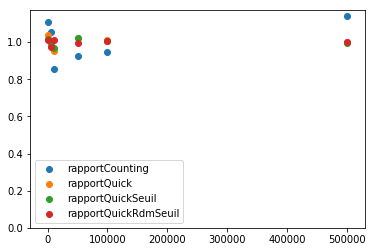

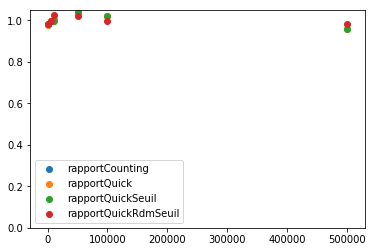

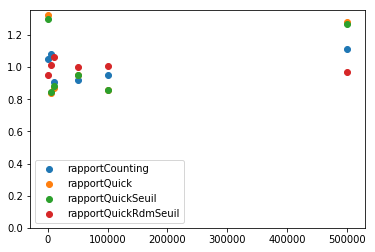

In [242]:
plotRapport(rapA)
plotRapport(rapB)
plotRapport(rapC)

Évidement, toutes les courbes tendent vers une valeur de 1 (donc multiplier notre fonction par une constante de 1) puisque c'est déjà une fonction qui colle aux données, qu'on a trouvée expérimentalement.

## Rapports théoriques

Fonctions f(x) pour le test du rapport
+ Note: Pour les meilleurs cas de tous les tri et le pire cas du tri par dénombrement, ce n'est volontairement pas la bonne fonction d'estimation de consommation de ressources. D'autres fonctions, qui ne sont pas bonnes pour représenter la quantité de ressources consommées, ont été prises à la place. C'est simplement pour ne pas avoir de fonctions et de graphs dupliqués, ce qui ne servirait à rien pour l'exéprience. Les tableaux suivants présentent les fonctions réelles, puis les fonctions utilisées pour l'exéprience. <br/>

**Réelles**

|Algo                   |  Meilleur 	| Moyen  	|Pire   	|
|:-:	                |:-:	        |:-:	    |:-:	|
|Counting   	        |   	x+max        |   x+max	    |   x+max	|
|Quick                  |   	xlog(x)        |   xlog(x)	    |   x^2	|
|QuickSeuil   	        |   	xlog(x)        |   xlog(x)	    |   x^2	|
|QuickRdmSeuil          |   	xlog(x)        |   xlog(x)	    |   x^2	|

**Pour l'expérience**

|Algo                   |  Meilleur 	| Moyen  	|Pire   	|
|:-:	                |:-:	        |:-:	    |:-:	|
|Counting   	        |   	1        |   x	    |   x^2	|
|Quick                  |   	log(x)        |   xlog(x)	    |   x^2	|
|QuickSeuil   	        |   	log(x)        |   xlog(x)	    |   x^2	|
|QuickRdmSeuil          |   	log(x)        |   xlog(x)	    |   x^2	|

In [316]:
def rapport_x(entrie):
    x = entrie["numbers"]
    y = entrie["times"]
    return y / x

def rapport_logx(entrie):
    x = entrie["numbers"]
    y = entrie["times"]
    return y / math.log(x)

def rapport_xlogx(entrie):
    x = entrie["numbers"]
    y = entrie["times"]
    return y / (x * math.log(x))

def rapport_xsquare(entrie):
    x = entrie["numbers"]
    y = entrie["times"]
    return y / (x ** 2)

#### Ajouter les colonnes rapport

In [317]:
serieA

,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil,logx,logy,rapportCounting,rapportQuick,rapportQuickSeuil,rapportQuickRdmSeuil
0,1000,0.115611,0.472569,0.432465,0.439416,3.00000,-0.357124,1.109450,1.038103,1.015502,1.011446
1,5000,0.512038,2.536519,2.450179,2.437307,3.69897,0.386910,1.051814,0.977193,0.996816,0.975530
2,10000,0.806963,5.227842,5.053352,5.364637,4.00000,0.729540,0.853425,0.951610,0.966311,1.010812
3,50000,4.098182,32.049810,30.790810,30.441270,4.69897,1.483463,0.927754,1.023126,1.020107,0.997372
4,100000,8.136531,66.929330,64.510050,65.131230,5.00000,1.813789,0.948322,1.009519,1.004552,1.004577
5,500000,45.746020,379.150500,369.774700,373.119600,5.69897,2.571848,1.141299,1.002945,0.997629,1.000705


In [318]:
rapCountingA      = serieA.loc[:,["numbers", "timeCounting"]]
rapQuickA         = serieA.loc[:,["numbers", "timeQuick"]]
rapQuickSeuilA    = serieA.loc[:,["numbers", "timeQuickSeuil"]]
rapQuickRdmSeuilA = serieA.loc[:,["numbers", "timeQuickRdmSeuil"]]

rapCountingA["times"] = rapCountingA["timeCounting"]
rapQuickA["times"] = rapQuickA["timeQuick"]
rapQuickSeuilA["times"] = rapQuickSeuilA["timeQuickSeuil"]
rapQuickRdmSeuilA["times"] = rapQuickRdmSeuilA["timeQuickRdmSeuil"]

In [319]:
rapQuickB         = serieB.loc[:,["numbers", "timeQuick"]]
rapQuickSeuilB    = serieB.loc[:,["numbers", "timeQuickSeuil"]]
rapQuickRdmSeuilB = serieB.loc[:,["numbers", "timeQuickRdmSeuil"]]

rapQuickB["times"] = rapQuickB["timeQuick"]
rapQuickSeuilB["times"] = rapQuickSeuilB["timeQuickSeuil"]
rapQuickRdmSeuilB["times"] = rapQuickRdmSeuilB["timeQuickRdmSeuil"]



In [320]:
rapCountingC      = serieC.loc[:,["numbers", "timeCounting"]]
rapQuickC         = serieC.loc[:,["numbers", "timeQuick"]]
rapQuickSeuilC    = serieC.loc[:,["numbers", "timeQuickSeuil"]]
rapQuickRdmSeuilC = serieC.loc[:,["numbers", "timeQuickRdmSeuil"]]

rapCountingC["times"] = rapCountingC["timeCounting"]
rapQuickC["times"] = rapQuickC["timeQuick"]
rapQuickSeuilC["times"] = rapQuickSeuilC["timeQuickSeuil"]
rapQuickRdmSeuilC["times"] = rapQuickRdmSeuilC["timeQuickRdmSeuil"]

In [327]:

def addColumnsQuick(rapdf):
    rapdf["rapBest"] = rapdf.apply(rapport_logx, axis=1)
    rapdf["rapAverage"] = rapdf.apply(rapport_xlogx, axis=1)
    rapdf["rapWorst"] = rapdf.apply(rapport_xsquare, axis=1)
    
def addColumnsCounting(rapdf):
    rapdf["rapBest"] = rapdf["times"]
    rapdf["rapAverage"] = rapdf.apply(rapport_x, axis=1)
    rapdf["rapWorst"] = rapdf.apply(rapport_xsquare, axis=1)

    
countingRaps = [rapCountingA, rapCountingC]
quickRaps = [rapQuickA, rapQuickB, rapQuickC, 
            rapQuickSeuilA, rapQuickSeuilB, rapQuickSeuilC,
            rapQuickRdmSeuilA, rapQuickRdmSeuilB, rapQuickRdmSeuilC]
quickRaps[1]
    
for df in countingRaps:
    addColumnsCounting(df)
for df in quickRaps:
    addColumnsQuick(df)
rapdfs = countingRaps + quickRaps

rapdfs[2]

,numbers,timeQuick,times,rapBest,rapAverage,rapWorst
0,1000,0.472569,0.472569,0.068411,0.000068,4.725694e-07
1,5000,2.536519,2.536519,0.297812,0.000060,1.014608e-07
2,10000,5.227842,5.227842,0.567606,0.000057,5.227842e-08
3,50000,32.049810,32.049810,2.962150,0.000059,1.281992e-08
4,100000,66.929330,66.929330,5.813408,0.000058,6.692933e-09
5,500000,379.150500,379.150500,28.893461,0.000058,1.516602e-09


#### Graphiques

In [323]:
%%javascript
//Pour pas avoir à scroller dans une petite boîte pour voir les graphs

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

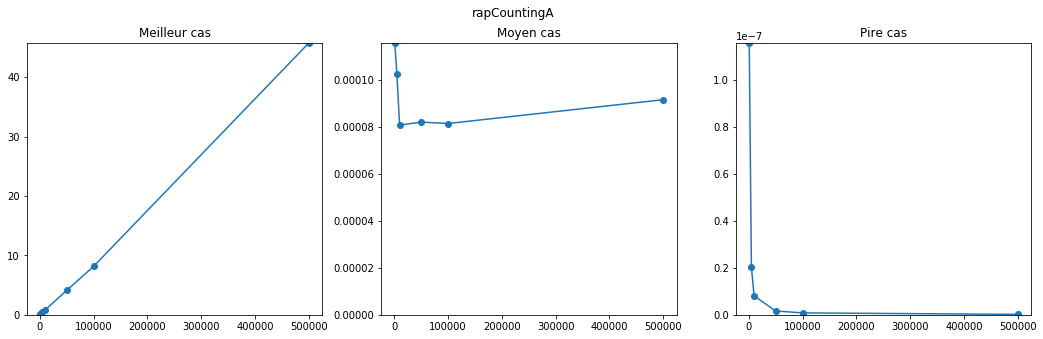

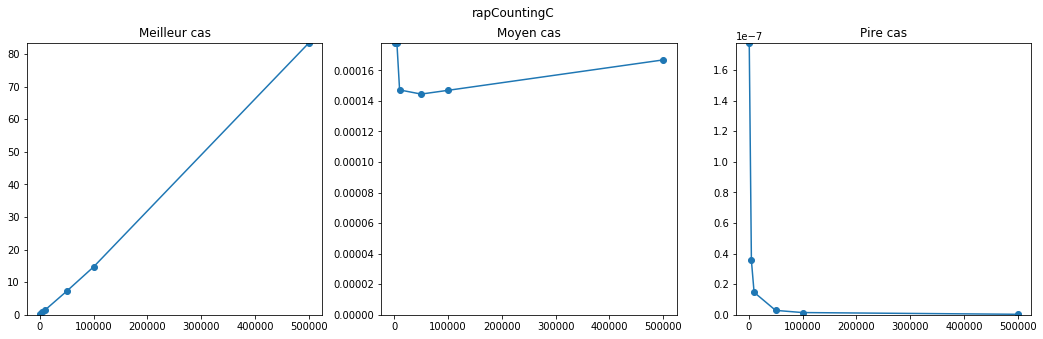

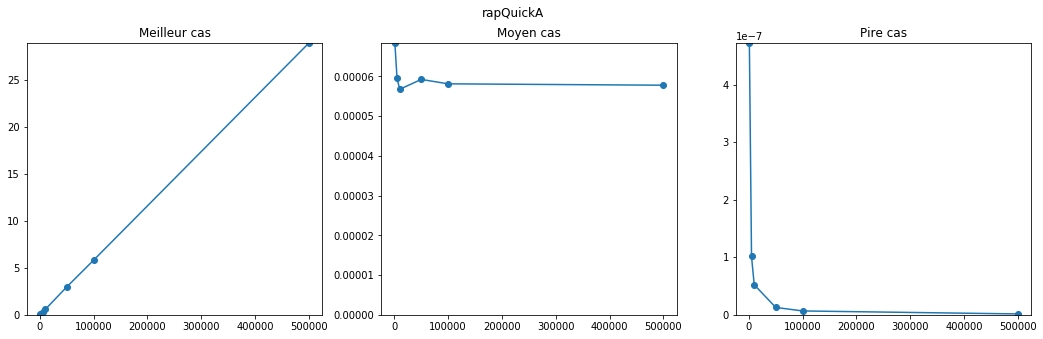

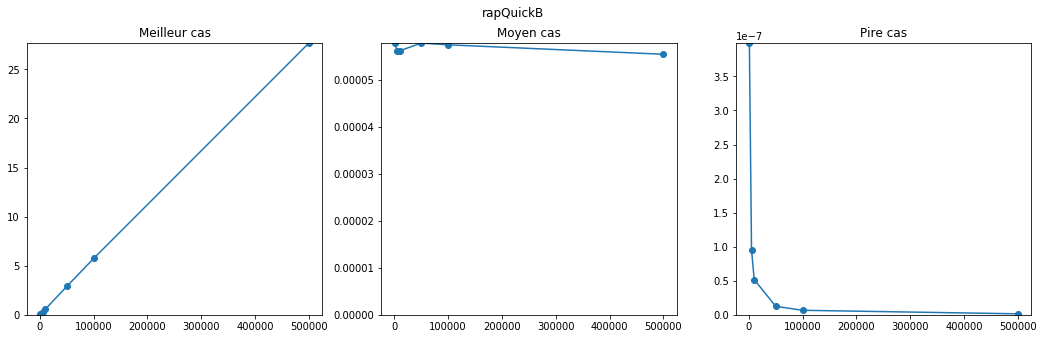

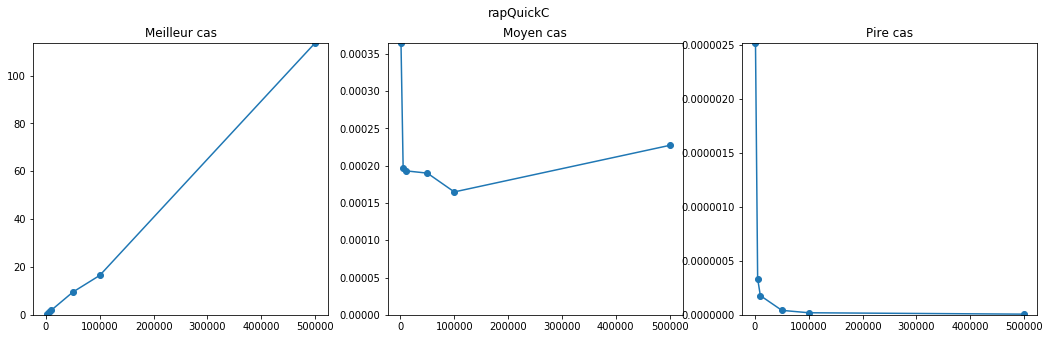

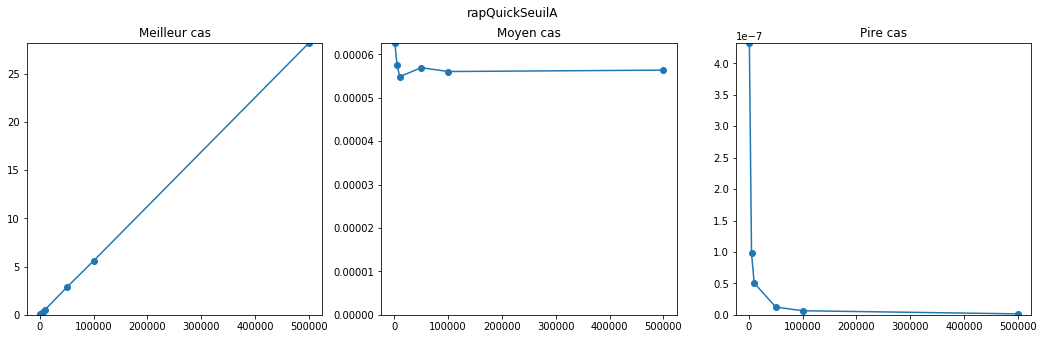

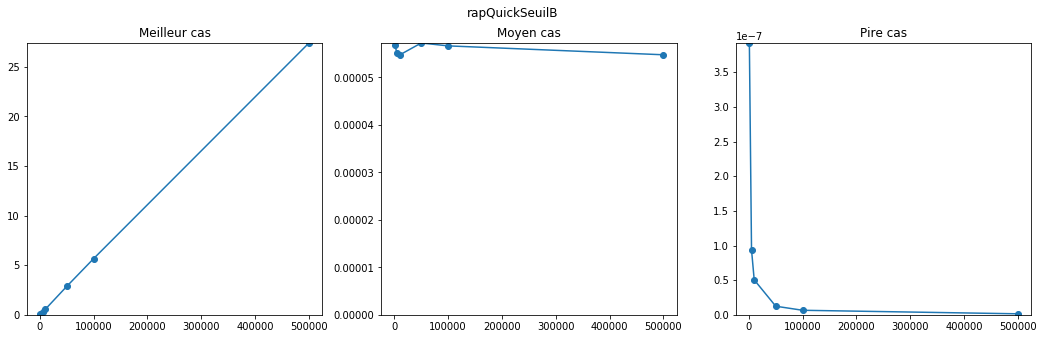

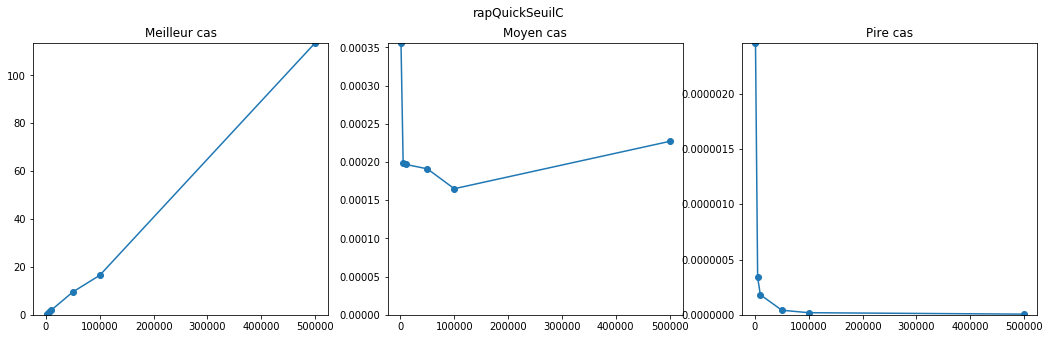

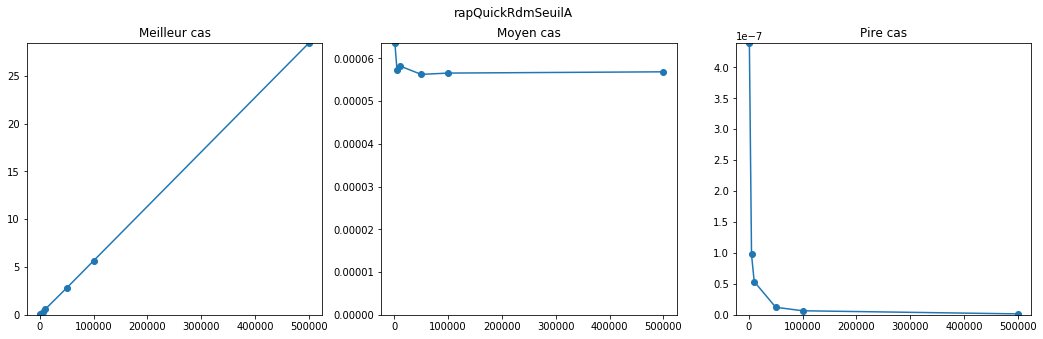

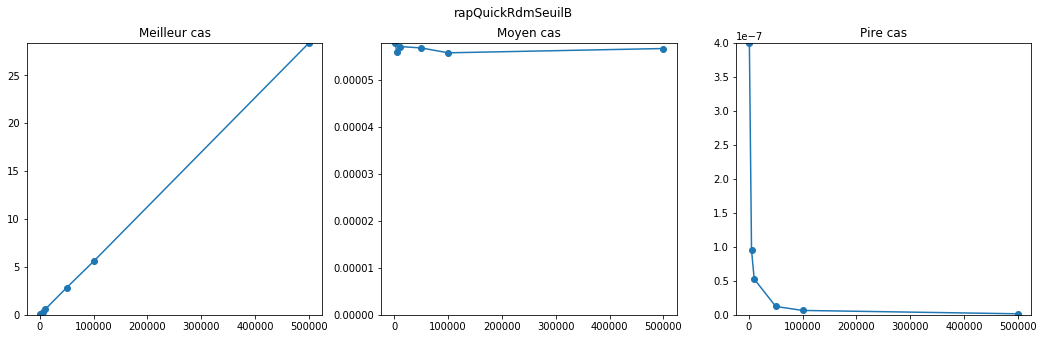

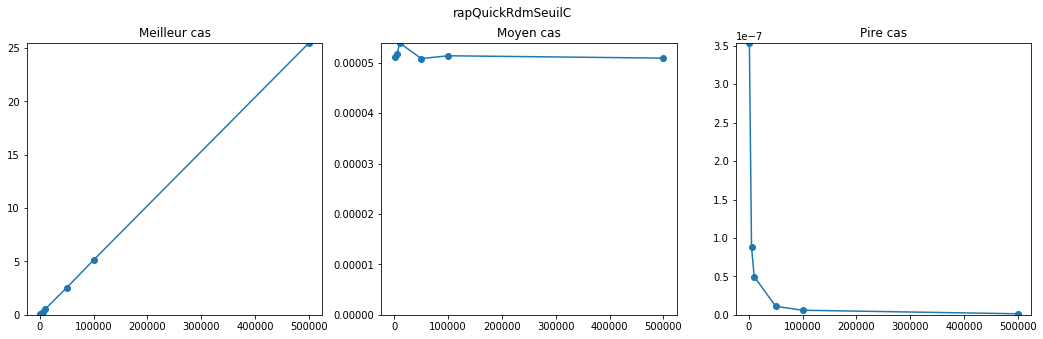

In [330]:

titles = ["rapCountingA", "rapCountingC", 
         "rapQuickA", "rapQuickB", "rapQuickC",
         "rapQuickSeuilA", "rapQuickSeuilB", "rapQuickSeuilC", 
         "rapQuickRdmSeuilA", "rapQuickRdmSeuilB", "rapQuickRdmSeuilC"]

def plotRap(rapdf, i):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(18, 5))
    f.suptitle(titles[i])
    
    ax1.set_ylim([0, rapdf["rapBest"].max()])
    ax1.scatter(rapdf["numbers"], rapdf["rapBest"])
    ax1.plot(rapdf["numbers"], rapdf["rapBest"])
    
    ax2.set_ylim([0, rapdf["rapAverage"].max()])
    ax2.scatter(rapdf["numbers"], rapdf["rapAverage"])
    ax2.plot(rapdf["numbers"], rapdf["rapAverage"])
    
    ax3.set_ylim([0, rapdf["rapWorst"].max()])
    ax3.scatter(rapdf["numbers"], rapdf["rapWorst"])
    ax3.plot(rapdf["numbers"], rapdf["rapWorst"])
    
    ax1.set_title("Meilleur cas")
    ax2.set_title("Moyen cas")
    ax3.set_title("Pire cas")
    
    #ax.set_ylim(ymin=0)
    #plt.tight_layout()
    plt.show()

i = 0
for rapdf in rapdfs:
    plotRap(rapdf, i)
    i += 1


Dans tous les cas, il semble que ce soit le cas moyen qui converge vers une constante b > 0. Les fonctions à utiliser seront donc:

Counting A: x
Counting C: x
Quick A: xlog(x)
Quick B: xlog(x)
Quick C: xlog(x)
QuickSeuil A: xlog(x)
QuickSeuil B: xlog(x)
QuickSeuil C: xlog(x)
QuickRdmSeuil A: xlog(x)
QuickRdmSeuil B: xlog(x)
QuickRdmSeuil C: xlog(x)


# TEST DES CONSTANTES

In [333]:
def fdex_xlogx(entrie):
    x = entrie["numbers"]
    return (x * math.log(x))

In [391]:
bs =[]
ords = []

In [392]:
def linearRegressionLine(serie, x, y, titleC):
    popt, pcov = curve_fit(logDroiteFunction, serie[x], serie[y])
    plt.plot(serie[x], logDroiteFunction(serie[x], *popt),  
         label=titleC + " ({0:.3f}*x+{1:.3f})".format(*popt))
    print titleC
    print ("\tR2: " + str(computeR2(popt, pcov, serie[x], serie[y])))
    print "\tm = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt)
    bs.append(popt[0])
    ords.append(popt[1])
    return popt


def plotConst(constdf, titleC):
    plt.figure(figsize=(11,6))
    plt.title("Test des constantes pour " + titleC + " (cas moyen)")
    plt.scatter(constdf["fdex"], constdf["times"])
    linearRegressionLine(constdf, "fdex", "times", titleC)
    plt.legend()
    #plt.set_ylim(ymin=0, ymax=constdf["times"].max())
    plt.show()


Test des constantes pour CountingA (cas moyen)
	R2: 0.9994498267663465
	m = popt[0] = 9.1718146847e-05
	b = popt[1] = -0.278156760939


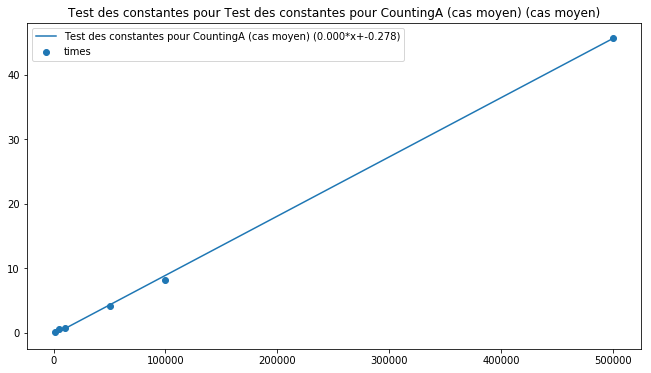

Test des constantes pour CountingC (cas moyen)
	R2: 0.9993472826484675
	m = popt[0] = 0.000167357492236
	b = popt[1] = -0.600536880352


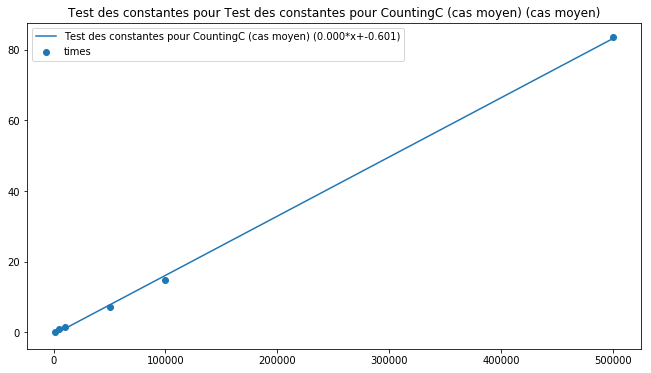

QuickA
	R2: 0.999995258176654
	m = popt[0] = 5.77609209069e-05
	b = popt[1] = 0.243359693943


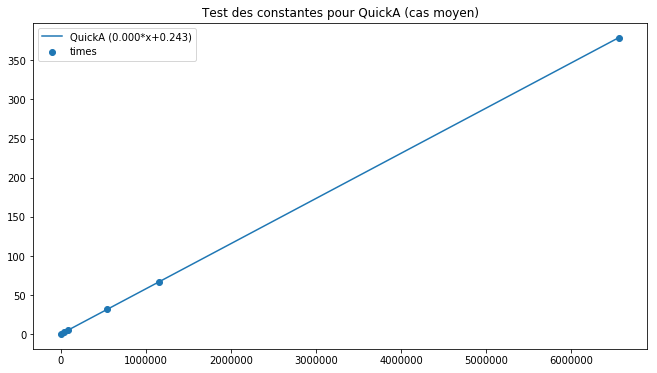

QuickB
	R2: 0.9999542533129232
	m = popt[0] = 5.53120893802e-05
	b = popt[1] = 0.697831018389


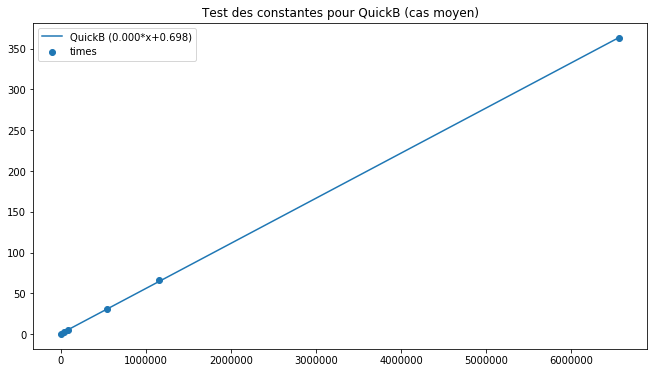

QuickC
	R2: 0.9976696546783431
	m = popt[0] = 0.000228428247736
	b = popt[1] = -17.5977696316


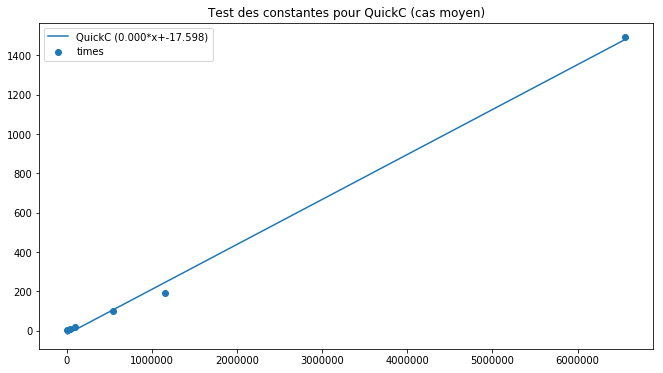

QuickSeuilA
	R2: 0.9999975918398486
	m = popt[0] = 5.63544607547e-05
	b = popt[1] = -0.0145898689359


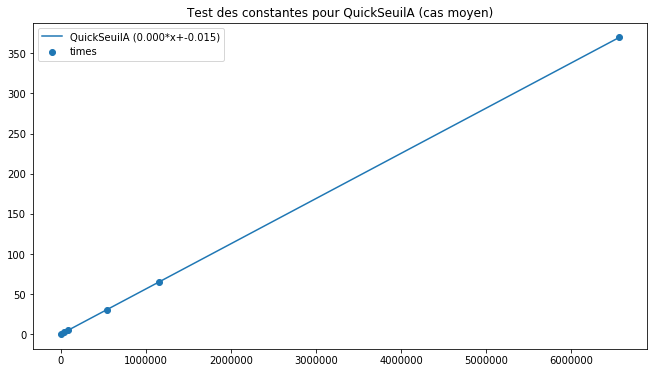

QuickSeuilB
	R2: 0.9999564064476957
	m = popt[0] = 5.47257421156e-05
	b = popt[1] = 0.660851278858


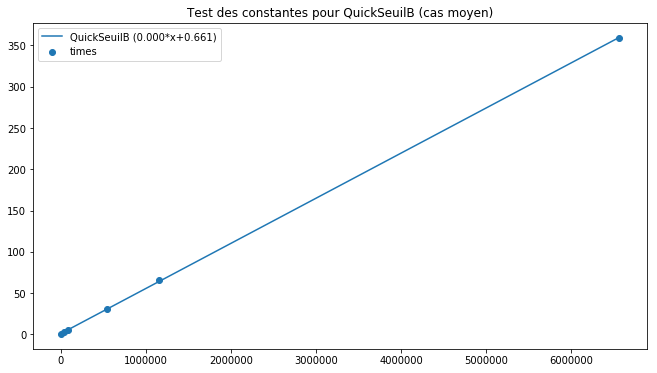

QuickSeuilC
	R2: 0.9976947586894785
	m = popt[0] = 0.000228159641939
	b = popt[1] = -17.2737414233


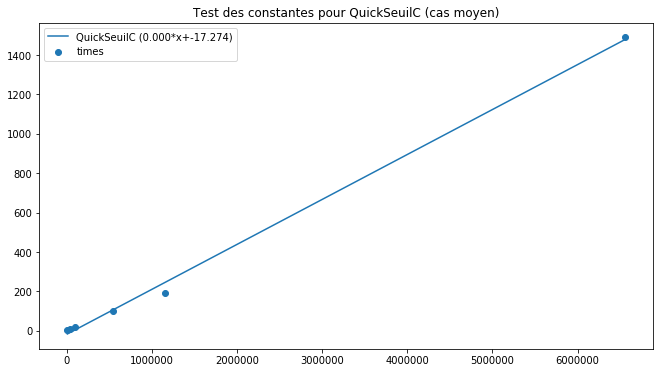

QuickRdmSeuilA
	R2: 0.9999981128110261
	m = popt[0] = 5.68710886682e-05
	b = popt[1] = -0.0837927213938


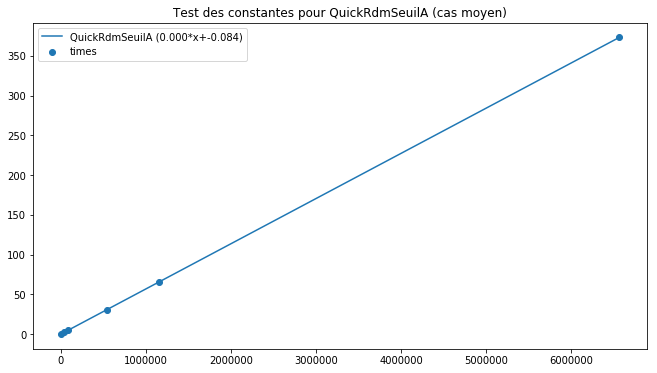

QuickRdmSeuilB
	R2: 0.9999909781739231
	m = popt[0] = 5.67667672705e-05
	b = popt[1] = -0.169997485405


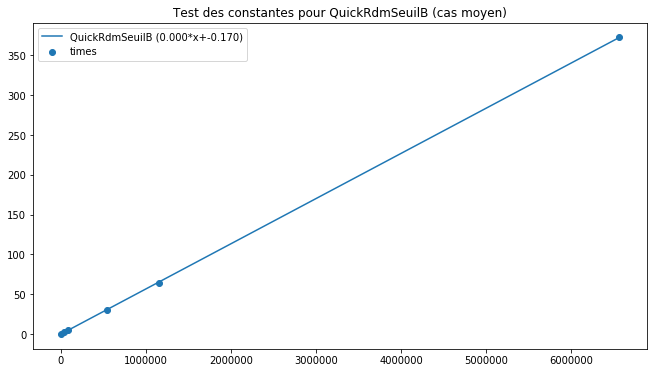

QuickRdmSeuilC
	R2: 0.9999970260748644
	m = popt[0] = 5.09281561673e-05
	b = popt[1] = 0.154992908582


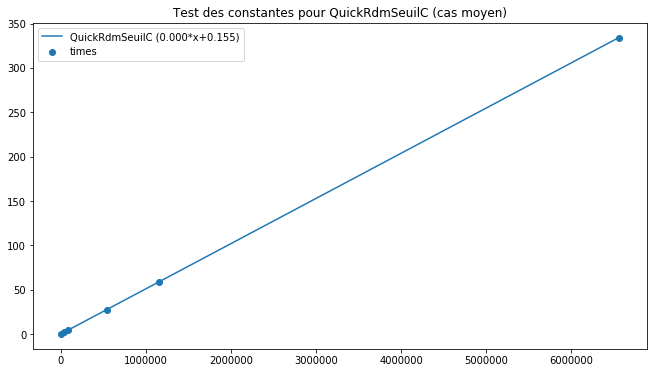

In [393]:
titlesConst = ["CountingA", "CountingC", 
         "QuickA", "QuickB", "QuickC",
         "QuickSeuilA", "QuickSeuilB", "QuickSeuilC", 
         "QuickRdmSeuilA", "QuickRdmSeuilB", "QuickRdmSeuilC"]

i = 0
for rapdf in rapdfs[:2]:
    constdf = rapdf
    constdf["fdex"] = constdf["numbers"]
    plotConst(constdf, "Test des constantes pour " + titlesConst[i] + " (cas moyen)")
    i += 1
for rapdf in rapdfs[2:]:
    constdf = rapdf
    constdf["fdex"] = constdf.apply(fdex_xlogx, axis = 1)
    plotConst(constdf, titlesConst[i] )
    i += 1

# Analyse


Consommation théorique en notation asymptotique

|Algo                   |  Meilleur 	            |  Moyen  	|Pire   	|
|:-:	                |:-:	                    |:-:	    |:-:	|
|Counting   	        |   	$O$((n+max))        |   $O$(n+max)	        |   $O$(n+max)	|
|Quick                  |   	$O$(nlog(n))        |   $O$(xlog(n))	    |   $O$(n^2)	    |
|QuickSeuil   	        |   	$O$(nlog(n))        |   $O$(xlog(n))	    |   $O$(n^2)	    |
|QuickRdmSeuil          |   	$O$(nlog(n))        |   $O$(xlog(n))	    |   $O$(n^2)	    |

timeCounting  
	R2: 0.9983944120392642  
	m = popt[0] = 0.980153276352  
	b = popt[1] = -3.71092147226  
timeQuick  
	R2: 0.9919299598561416  
	m = popt[0] = 1.03298243272  
	b = popt[1] = -2.8199591041  
timeQuickSeuil  
	R2: 0.9928078622243551  
	m = popt[0] = 1.03494949116  
	b = popt[1] = -2.82776927015  
timeQuickRdmSeuil  
	R2: 0.999757245207404  
	m = popt[0] = 1.09971268476  
	b = popt[1] = -3.72921050991  

In [410]:
#test de puissance: intersection
def line_intersection():
    a1 = 1.03298243272
    a2 = 1.09971268476
    b1 = -2.8199591041
    b2 = -3.72921050991
    x = (b2-b1)/a1-a2
    y = a1*x + b1
    return x, y

print line_intersection()

(-1.9799323061293614, -4.865194394306427)


Constantes B du test du rapport

|Algo-Série             |  b 	 (moyen cas)        |
|:-:	                |:-:	                    |
|Counting A 	        |   	       0.00009             |
|Counting C             |   	       0.00016             |
|Quick A  	            |   	       0.00006             |
|Quick B                |   	       0.00006             |
|Quick C  	            |   	       0.00020             |
|QuickSeuil A           |   	       0.00006             |
|QuickSeuil B 	        |   	       0.00005             |
|QuickSeuil C 	        |   	       0.00020             |
|QuickRdmSeuil A        |   	       0.00006             |
|QuickRdmSeuil B        |   	       0.00006             |
|QuickRdmSeuil C        |   	       0.00005             |




In [397]:
import pandas as pd
dconst = {'algo-serie':titlesConst, 'pente':bs, 'ordonnée à l\'origine':ords}
testConstantes = pd.DataFrame(data=dconst)
testConstantes

,algo-serie,ordonnée à l'origine,pente
0,CountingA,-0.278157,0.000092
1,CountingC,-0.600537,0.000167
2,QuickA,0.243360,0.000058
3,QuickB,0.697831,0.000055
4,QuickC,-17.597770,0.000228
5,QuickSeuilA,-0.014590,0.000056
6,QuickSeuilB,0.660851,0.000055
7,QuickSeuilC,-17.273741,0.000228
8,QuickRdmSeuilA,-0.083793,0.000057
9,QuickRdmSeuilB,-0.169997,0.000057
